<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [4]:
#to import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


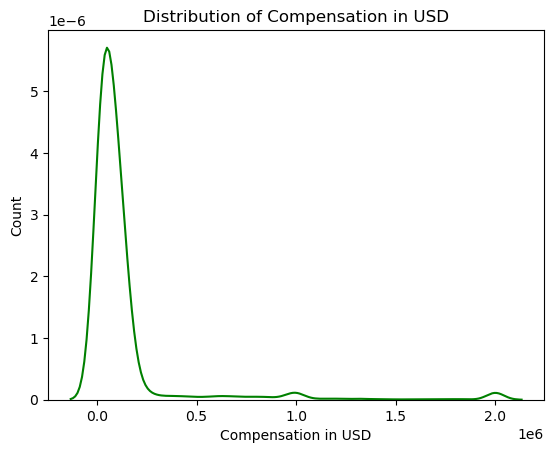

In [5]:
# your code goes here
#replace the missing values with the mean
mean = df["ConvertedComp"].mean(axis=0)
df["ConvertedComp"].replace(np.nan, mean, inplace=True)

#to create the distribution curve
data = df["ConvertedComp"]
sns.distplot(data, 
             hist=False,
             color='green'
             )
plt.title("Distribution of Compensation in USD")
plt.ylabel("Count")
plt.xlabel("Compensation in USD")

plt.show()

Plot the histogram for the column `ConvertedComp`.


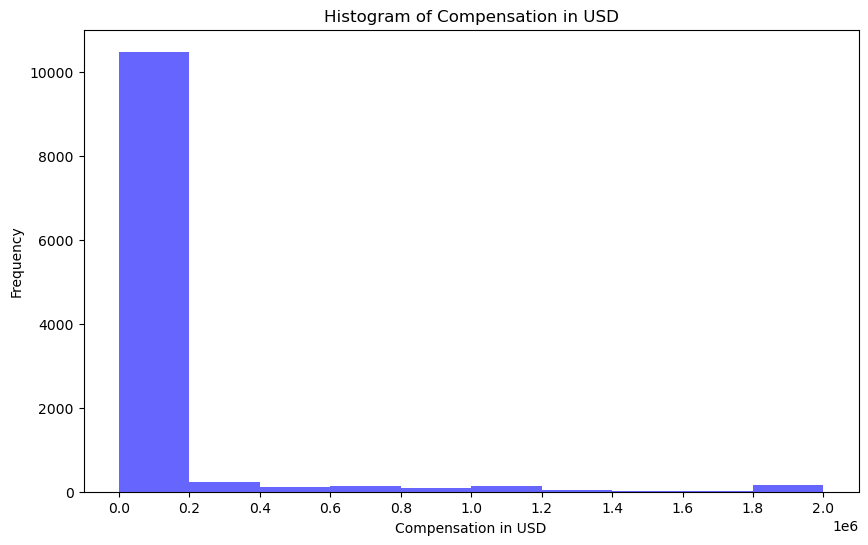

In [6]:
# your code goes here
#to divide the bins
count, bin_edges = np.histogram(df["ConvertedComp"])

#to create the histogram                     
df["ConvertedComp"].plot(kind='hist',
                         figsize = (10, 6),
                         alpha=0.6,
                         xticks=bin_edges,
                         color='b'
                        )
plt.title ("Histogram of Compensation in USD")
plt.xlabel("Compensation in USD")

plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
median = df["ConvertedComp"].median(axis=0)
median

63016.0

How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
df["Gender"].value_counts().loc["Man"]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
df.groupby("Gender")["ConvertedComp"].median().loc["Woman"]

61071.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
df["Age"].describe().loc[["min", "25%", "50%", "75%", "max"]]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


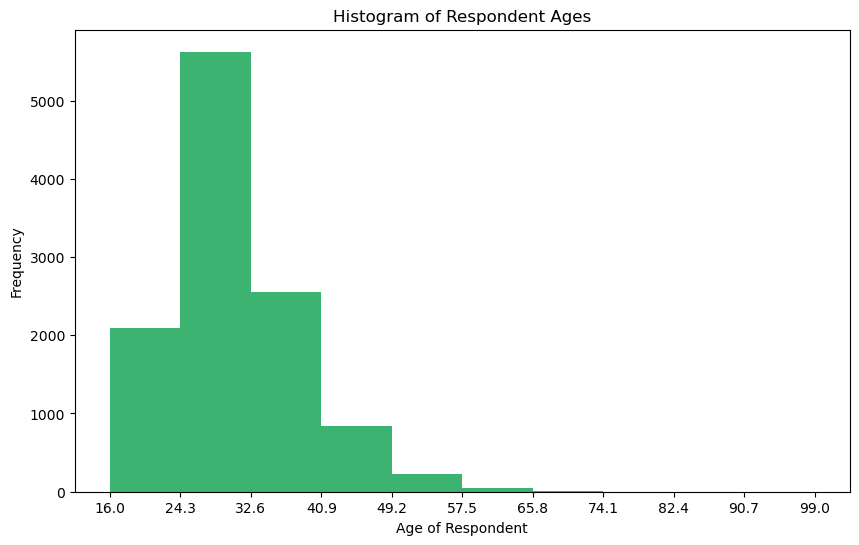

In [11]:
# your code goes here
#to calculate the mean age and replace null values with mean
mean = df["Age"].mean(axis=0)
df["Age"].replace(np.nan, mean, inplace=True)

#to create the histogram
count, bin_edges = np.histogram(df["Age"])

df["Age"].plot(kind='hist',
               figsize=(10, 6),
               xticks=bin_edges,
               color='mediumseagreen'
              )

plt.title("Histogram of Respondent Ages")
plt.xlabel("Age of Respondent")

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


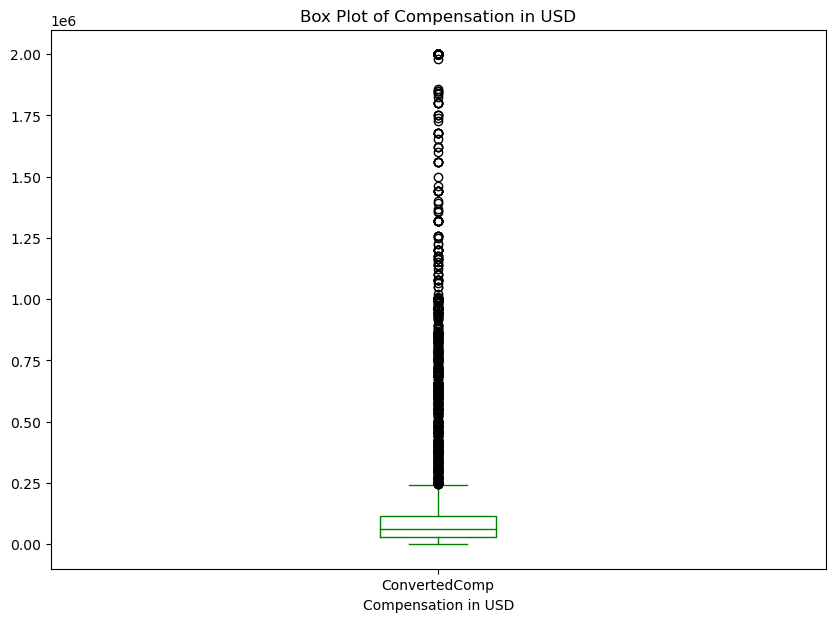

In [12]:
# your code goes here
df["ConvertedComp"].plot(kind='box',
                         figsize=(10,7),
                         color='green',
                         )

plt.title("Box Plot of Compensation in USD")
plt.xlabel("Compensation in USD")

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3-Q1
IQR

86448.0

Find out the upper and lower bounds.


In [14]:
# your code goes here
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

print("Lower Bound :", lower_range)
print("Upper Bound :", upper_range)

Lower Bound : -100656.0
Upper Bound : 245136.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
lower_bound = df["ConvertedComp"]<lower_range
upper_bound = df["ConvertedComp"]>upper_range
no_of_outliers = df[lower_bound | upper_bound]

print(len(no_of_outliers))

811


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here
x = df["ConvertedComp"].clip(lower_range, upper_range)
new_df = df[df["ConvertedComp"]==x]
len(new_df)

10587

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [17]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002101,-0.015314,0.004621,0.003991
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006974
ConvertedComp,0.002101,0.001037,1.000000,0.020694,-0.031220,0.100299
WorkWeekHrs,-0.015314,0.003510,0.020694,1.000000,0.026517,0.036458
CodeRevHrs,0.004621,0.007063,-0.031220,0.026517,1.000000,-0.019572
Age,0.003991,0.006974,0.100299,0.036458,-0.019572,1.000000


In [18]:
df["Age"].median()

29.0

In [19]:
new_df.median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9064\2290338713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.median()


Respondent       12466.0
CompTotal        64000.0
ConvertedComp    57828.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [20]:
new_df.mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9064\3764789720.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.mean()


Respondent        12473.855672
CompTotal        722627.256494
ConvertedComp     66462.393124
WorkWeekHrs          41.906605
CodeRevHrs            4.810525
Age                  30.672270
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
